# Testing Boosting on Stock Prices

### Testing Boosting on Stock Prices

#### Import Required Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Read the Dataset

In [16]:
df=pd.read_csv(r"C:\Users\hp\Downloads\TATASTEEL.NS.csv")

In [17]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,11.172855,11.214964,11.035300,11.186892,2.568284,10242229.0
1,1996-01-02,11.172855,11.214964,10.951082,10.979155,2.520592,16954313.0
2,1996-01-03,10.979155,11.229000,10.951082,10.981962,2.521237,13514114.0
3,1996-01-04,10.807913,10.807913,10.386825,10.633863,2.441320,34785820.0
4,1996-01-05,10.504730,10.555260,10.316644,10.423319,2.392984,30138033.0
...,...,...,...,...,...,...,...
6883,2023-05-08,109.250000,109.849998,108.250000,109.550003,109.550003,23130472.0
6884,2023-05-09,109.599998,111.199997,109.150002,109.550003,109.550003,27999202.0
6885,2023-05-10,109.599998,110.000000,108.599998,109.250000,109.250000,19213215.0
6886,2023-05-11,109.199997,109.500000,108.250000,108.550003,108.550003,19817637.0


#### Data Exploration

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6888 entries, 0 to 6887
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6888 non-null   object 
 1   Open       6881 non-null   float64
 2   High       6881 non-null   float64
 3   Low        6881 non-null   float64
 4   Close      6881 non-null   float64
 5   Adj Close  6881 non-null   float64
 6   Volume     6881 non-null   float64
dtypes: float64(6), object(1)
memory usage: 376.8+ KB


#### Descriptive Summary of Data

In [19]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6881.000000,6881.000000,6881.000000,6881.000000,6881.000000,6.881000e+03
mean,37.963880,38.573717,37.272193,37.892717,15.986067,6.973299e+07
std,29.775267,30.186017,29.278248,29.713323,20.208478,5.827671e+07
min,3.705570,3.910499,3.705570,3.775751,0.902283,0.000000e+00
25%,10.580525,10.723695,10.389632,10.529995,2.436164,3.286130e+07
50%,34.679611,35.156597,34.031754,34.609184,12.329805,5.377344e+07
75%,51.076210,51.860001,50.237804,51.020000,18.855690,8.750249e+07
max,161.486557,161.486557,161.486557,161.486557,123.550003,6.428460e+08


#### Check if there were any null values

In [20]:
df.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### Check if there were any duplicate values

In [23]:
df.duplicated().sum()

0

#### Feature Engineering

In [25]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,11.172855,11.214964,11.035300,11.186892,2.568284,10242229.0
1,1996-01-02,11.172855,11.214964,10.951082,10.979155,2.520592,16954313.0
2,1996-01-03,10.979155,11.229000,10.951082,10.981962,2.521237,13514114.0
3,1996-01-04,10.807913,10.807913,10.386825,10.633863,2.441320,34785820.0
4,1996-01-05,10.504730,10.555260,10.316644,10.423319,2.392984,30138033.0


#### Split Date into Year, Month and Date

In [26]:
df["Year"]=df["Date"].str[0:4]

In [27]:
df["date"]=df["Date"].str[8:10]

In [28]:
df["month_num"]=df["Date"].str[5:7]

In [29]:
def month_name(num):
    if num == "01":
        return "January"
    elif num == "02":
        return "February"
    elif num == "03":
        return "March"
    elif num == "04":
        return "April"
    elif num == "05":
        return "May"
    elif num == "06":
        return "June"
    elif num == "07":
        return "July"
    elif num == "08":
        return "August"
    elif num == "09":
        return "September"
    elif num == "10":
        return "October"
    elif num == "11":
        return "November"
    elif num == "12":
        return "December"
    else:
        return "Invalid Month"

In [30]:
df['month_name']=df['Date'].str[5:7].apply(month_name)

In [31]:
df["Year"]=df["Year"].astype(int)
df["date"]=df["date"].astype(int)
df["month_num"]=df["month_num"].astype(int)

In [32]:
df['Date'] = pd.to_datetime(df['Date'])

#### EDA                  Opening vs Closing

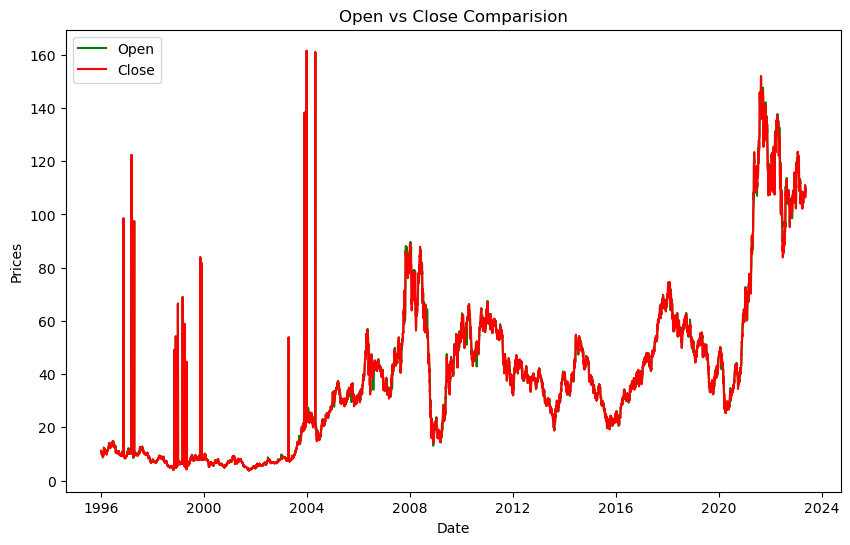

In [35]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df["Date"],y=df["Open"],c="g", label="Open")
sns.lineplot(x=df["Date"],y=df["Close"],c="r", label="Close")
plt.ylabel("Prices")
plt.title("Open vs Close Comparision")
plt.legend()

#### Observations:
• Opening prices were mostly higher than closing

#### Prices by date

In [36]:
sorted_df=df.sort_values(by="date")

In [37]:
sorted_df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,date,month_num,month_name
0,1996-01-01,11.172855,11.214964,11.035300,11.186892,2.568284,10242229.0,1996,1,1,January
2088,2004-01-01,25.001369,25.287708,24.964874,25.043478,6.989944,87720984.0,2004,1,1,January
5010,2015-10-01,20.483837,20.531473,20.031286,20.221834,7.884157,51146998.0,2015,1,10,October
2065,2003-12-01,20.436781,20.829796,20.425552,20.754000,5.792698,116010180.0,2003,1,12,December
5048,2015-12-01,21.989161,22.722769,21.941525,22.632257,8.823941,69133459.0,2015,1,12,December
...,...,...,...,...,...,...,...,...,...,...,...
1218,2000-08-31,6.175950,6.201215,6.091732,6.119805,1.510646,8468429.0,2000,31,8,August
1890,2003-03-31,7.627298,7.627298,7.411140,7.506587,1.991843,50606800.0,2003,31,3,March
6652,2022-05-31,104.500000,107.190002,103.699997,105.565002,46.925224,121248850.0,2022,31,5,May
2619,2006-01-31,33.240650,34.318634,33.240650,34.061771,10.204928,81755995.0,2006,31,1,January


Text(0.5, 1.0, 'Open Prices by Dates')

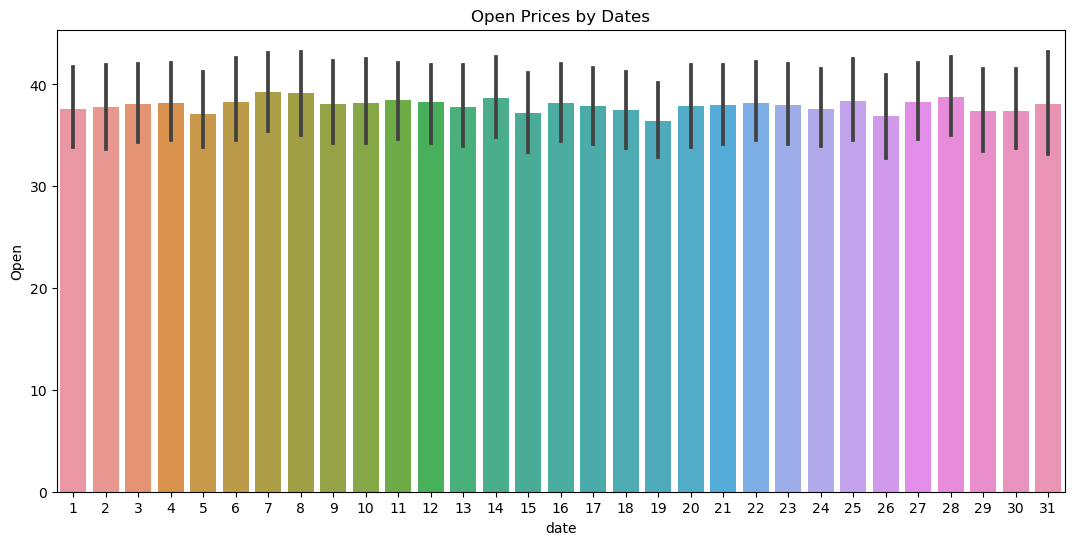

In [38]:
plt.figure(figsize=(13,6))
sns.barplot(x=sorted_df['date'],y=sorted_df["Open"])
plt.title("Open Prices by Dates")

#### Open Prices by month

In [39]:
sorted_df=df.sort_values(by="month_num")

Text(0.5, 1.0, 'Open Prices by Months')

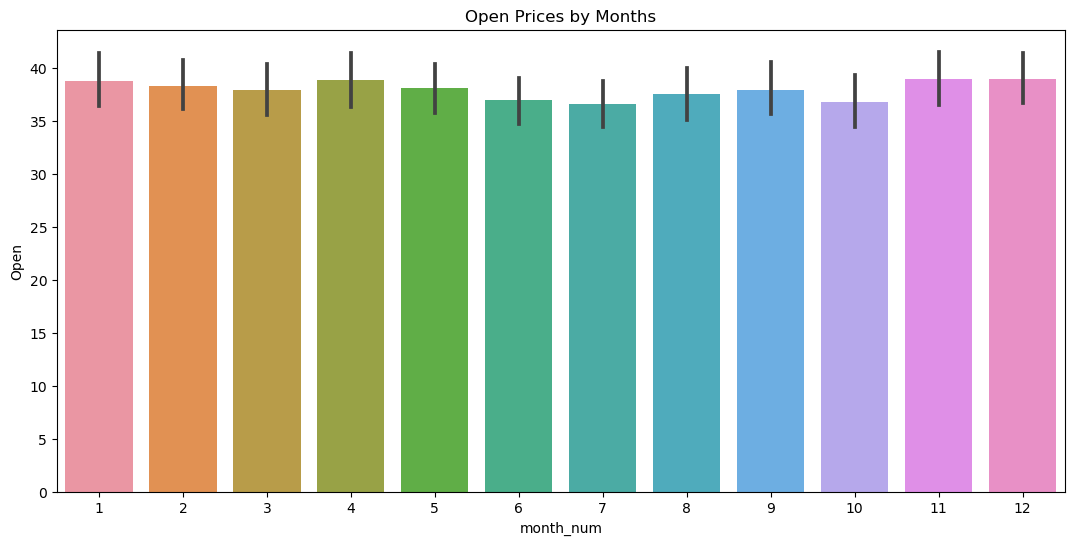

In [40]:
plt.figure(figsize=(13,6))
sns.barplot(x=sorted_df['month_num'],y=sorted_df["Open"])
plt.title("Open Prices by Months")

#### Coreleation of features

<AxesSubplot:>

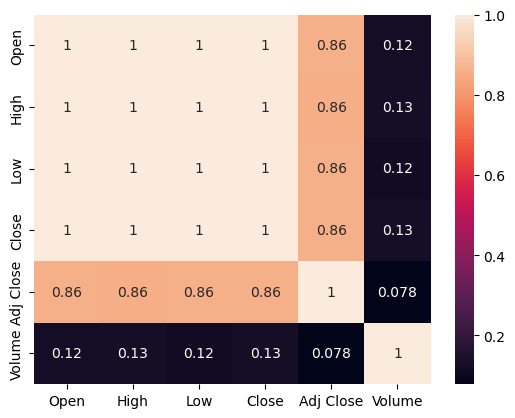

In [41]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols]
sns.heatmap(df_numeric.corr(), annot=True)

#### Observations:
• High, Low, Close were very similar to Open. so we can drop them

• As it will be difficult to predict Adj close and also Volume by the user, its better to remove
those also

• As we cant use DateTime directly in ML training, remove Date also

In [42]:
df.drop(["High","Low","Close","Adj Close","Volume","Date"],axis=1,inplace=True)

In [43]:
df=df.sample(frac=1)

In [44]:
df

,Open,Year,date,month_num,month_name
2204,16.840693,2004,11,6,June
1130,6.069274,2000,1,5,May
1208,6.049624,2000,17,8,August
4072,34.803471,2011,20,12,December
4425,30.011204,2013,21,5,May
...,...,...,...,...,...
6491,131.399994,2021,5,10,October
4430,30.111240,2013,28,5,May
2797,43.793102,2006,18,10,October
2921,40.140591,2007,23,4,April


#### Divide and Split data for model building

In [45]:
x = df.drop(["Open","month_name"], axis=1)

In [46]:
y=df['Open']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 25 , random_state=25)

#### Import the Models

In [50]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
print(np.isnan(x_train).sum())
print(np.isnan(y_train).sum())

Year         0
date         0
month_num    0
dtype: int64
0


In [52]:
x_train = pd.DataFrame(x_train).fillna(np.mean(x_train))
y_train = pd.DataFrame(y_train).fillna(np.mean(y_train))

#### Model 1

In [53]:
model1 = AdaBoostRegressor()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

In [54]:
from sklearn.metrics import r2_score

In [55]:
r2_score(y_test,y_pred)

0.7783016579613931

#### Model 2

In [56]:
model2=GradientBoostingRegressor()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
r2_score(y_test,y_pred)

0.9775181399637517

In [57]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [58]:
mean_absolute_error(y_test,y_pred)

3.0289872307502264

In [60]:
mean_absolute_percentage_error(y_test,y_pred)

0.1040329799168452